In [1]:
import pandas as pd

In [2]:
# ビデオより一部変更。詳細はレクチャー「サイトの変更に伴うコードの変更点」をご参照ください
import requests

In [3]:
url = "https://finance.yahoo.com/quote/AAPL/history?p=AAPL"

In [4]:
# ビデオより一部変更。詳細はレクチャー「サイトの変更に伴うコードの変更点」をご参照ください
data = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text,header=0)

In [5]:
data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Feb 11, 2022",172.33,173.08,168.04,168.64,168.64,98566000
1,"Feb 10, 2022",174.14,175.48,171.55,172.12,172.12,90865900
2,"Feb 09, 2022",176.05,176.65,174.90,176.28,176.28,71285000
3,"Feb 08, 2022",171.73,175.35,171.43,174.83,174.83,74829200
4,"Feb 07, 2022",172.86,173.95,170.95,171.66,171.66,77251200


In [6]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"Sep 29, 2021",142.47,144.45,142.03,142.83,142.44,74602000
97,"Sep 28, 2021",143.25,144.75,141.69,141.91,141.52,108972300
98,"Sep 27, 2021",145.47,145.96,143.82,145.37,144.97,74150700
99,"Sep 24, 2021",145.66,147.47,145.56,146.92,146.52,53477900
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


In [7]:
data[0]["Adj Close**"] = pd.to_numeric(data[0]["Adj Close**"],errors="coerce")

In [8]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"Sep 29, 2021",142.47,144.45,142.03,142.83,142.44,74602000
97,"Sep 28, 2021",143.25,144.75,141.69,141.91,141.52,108972300
98,"Sep 27, 2021",145.47,145.96,143.82,145.37,144.97,74150700
99,"Sep 24, 2021",145.66,147.47,145.56,146.92,146.52,53477900
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,NaN,*Close price adjusted for splits.**Adjusted cl...


In [9]:
data[0].dropna(inplace=True)

In [10]:
data[0].tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
95,"Sep 30, 2021",143.66,144.38,141.28,141.50,141.11,88934200
96,"Sep 29, 2021",142.47,144.45,142.03,142.83,142.44,74602000
97,"Sep 28, 2021",143.25,144.75,141.69,141.91,141.52,108972300
98,"Sep 27, 2021",145.47,145.96,143.82,145.37,144.97,74150700
99,"Sep 24, 2021",145.66,147.47,145.56,146.92,146.52,53477900


In [11]:
from datetime import datetime as dt

In [12]:
data[0]["Date2"] = [dt.strptime(i,"%b %d, %Y") for i in data[0]["Date"]]

In [13]:
data[0]["Date2"].head()

0   2022-02-11
1   2022-02-10
2   2022-02-09
3   2022-02-08
4   2022-02-07
Name: Date2, dtype: datetime64[ns]

In [14]:
data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Date2
0,"Feb 11, 2022",172.33,173.08,168.04,168.64,168.64,98566000,2022-02-11
1,"Feb 10, 2022",174.14,175.48,171.55,172.12,172.12,90865900,2022-02-10
2,"Feb 09, 2022",176.05,176.65,174.90,176.28,176.28,71285000,2022-02-09
3,"Feb 08, 2022",171.73,175.35,171.43,174.83,174.83,74829200,2022-02-08
4,"Feb 07, 2022",172.86,173.95,170.95,171.66,171.66,77251200,2022-02-07


In [15]:
data[0].set_index("Date2",inplace=True)

In [16]:
data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
Date2,,,,,,,
2022-02-11,"Feb 11, 2022",172.33,173.08,168.04,168.64,168.64,98566000
2022-02-10,"Feb 10, 2022",174.14,175.48,171.55,172.12,172.12,90865900
2022-02-09,"Feb 09, 2022",176.05,176.65,174.90,176.28,176.28,71285000
2022-02-08,"Feb 08, 2022",171.73,175.35,171.43,174.83,174.83,74829200
2022-02-07,"Feb 07, 2022",172.86,173.95,170.95,171.66,171.66,77251200


In [17]:
data[0]["Adj Close**"].dtype

dtype('float64')

<AxesSubplot:title={'center':'AAPL Stock Price'}, xlabel='Date2'>

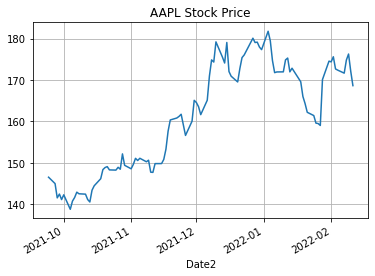

In [18]:
data[0]["Adj Close**"].plot(title="AAPL Stock Price",grid=True)

In [19]:
data[0].to_csv("AAPL_Stock.csv")